In [1]:
print("Hello")

Hello


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.preprocessing import image

In [3]:
path1 ='dev_im'
imgs_D = os.listdir(path1)
path2 ='dev_imN'
imgs_N = os.listdir(path2)

In [4]:
img_path1  = r'C:/Users/shivendra/Desktop/Testing/dev_im/'
img_path2 = r'C:/Users/shivendra/Desktop/Testing/dev_imN/'

In [5]:
im_vec = []
Y=[]
for i in range(len(imgs_N)-1):
    img_t = cv2.imread(os.path.join(img_path1,imgs_D[i]))
    img_t = image.img_to_array(img_t)
    img_t = img_t/255
    img_t = cv2.resize(img_t,(128,128))
    im_vec.append(img_t)
    Y.append(1)
for i in range(len(imgs_N)-1):
    img_t = cv2.imread(os.path.join(img_path2,imgs_N[i]))
    img_t = image.img_to_array(img_t)
    img_t = img_t/255
    img_t = cv2.resize(img_t,(128,128))
    im_vec.append(img_t)
    Y.append(0)

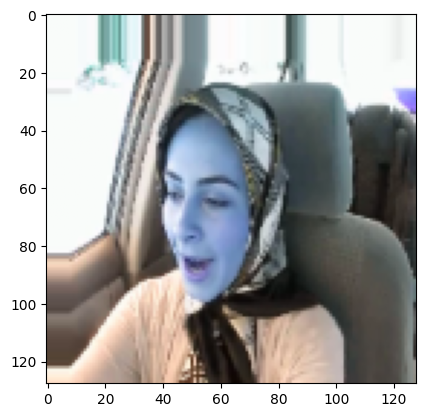

In [6]:
plt.imshow(im_vec[0])

In [7]:
X = im_vec
X = np.array(X)
Y = np.array(Y)

In [9]:
X.shape

(14100, 128, 128, 3)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

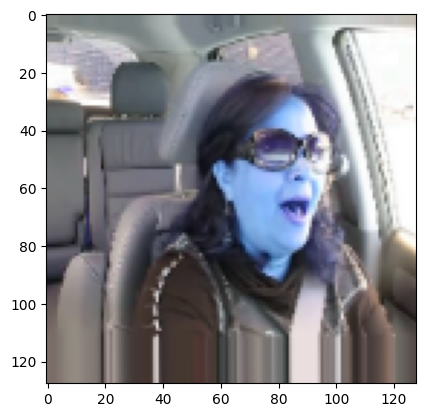

In [55]:
plt.imshow(X_train[0])

In [58]:
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from keras.models import Sequential

In [60]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [61]:

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,905 (12.65 MB)

 Trainable params: 3,315,457 (12.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [66]:
cb = keras.callbacks.EarlyStopping(
    monitor ='val_loss',
    min_delta = 0.0001,
    patience = 19,
    verbose =1,
    mode ="auto",
    baseline = None,
    restore_best_weights = True
)

In [67]:
history = model.fit(X_train,Y_train,batch_size=100,epochs=50,validation_split=0.2,callbacks=cb)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6216 - loss: 0.6614 - val_accuracy: 0.5301 - val_loss: 0.6896
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.6367 - loss: 0.5960 - val_accuracy: 0.5168 - val_loss: 0.7213
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.6894 - loss: 0.5405 - val_accuracy: 0.5155 - val_loss: 0.8851
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7140 - loss: 0.5278 - val_accuracy: 0.5301 - val_loss: 0.7731
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.8007 - loss: 0.4190 - val_accuracy: 0.5195 - val_loss: 2.1993
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9116 - loss: 0.2347 - val_accuracy: 0.5191 - val_loss: 3.2568
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9505 - loss: 0.1437 - val_accuracy: 0.5492 - val_loss: 2.5303
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9580 - loss: 0.1163 - val_accuracy: 0.7926 - v

In [108]:
model.save("classifier_accurate.keras")

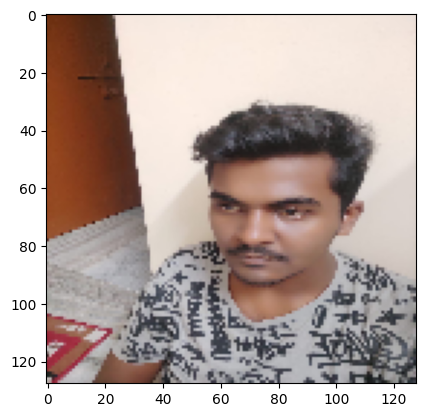

In [106]:
img = image.load_img("t3.jpeg")
img = image.img_to_array(img)
# img = np.rot90(img,k=1)
img = cv2.resize(img,(128,128))
img = img/255
plt.imshow(img)

In [107]:
results = model.predict(img.reshape(1,128,128,3))
if(results>0.19):
    print("Sleep Alert")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
